In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, recall_score

In [2]:
data = pd.read_csv('../data/raw/creditcard.csv.zip')
pd.options.display.max_columns = 32
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
fraud = data.loc[data['Class'] == 1]
not_fraud= data.loc[data['Class'] == 0]

<AxesSubplot:>

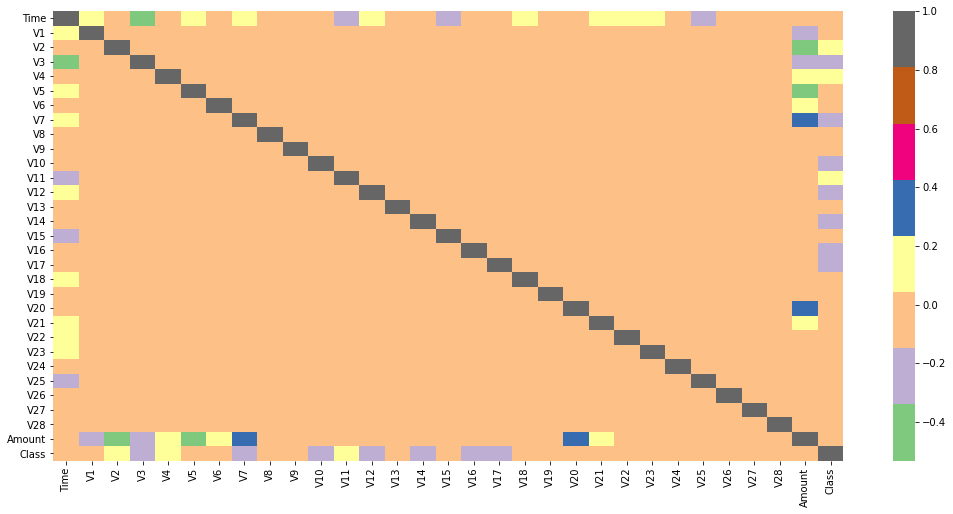

In [12]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = 17.7,8.27
mat_corr = data.corr()
# scamat=scatter_matrix(mat_corr)
sns.heatmap(mat_corr,cmap='Accent')

In [13]:
mat_corr['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [215]:
data_test=  data[['V11','V4','Amount','Class']]
data_test['V1714'] = data['V17'] * data['V14']
data_test['V1412'] = data['V12'] / data['V14']

# data_test.loc[:,'V1714'] =data_test.loc[:, ('V17')] * data_test.loc[:, ('V14')] 

# data_test.head()
data_test_corr = data_test.corr()
data_test_corr['Class'].sort_values(ascending=False)

<ipython-input-215-242e49e922a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['V1714'] = data['V17'] * data['V14']
<ipython-input-215-242e49e922a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['V1412'] = data['V12'] / data['V14']


Class     1.000000
V1714     0.542507
V11       0.154876
V4        0.133447
Amount    0.005632
V1412     0.000105
Name: Class, dtype: float64

<AxesSubplot:xlabel='Amount', ylabel='V1412'>

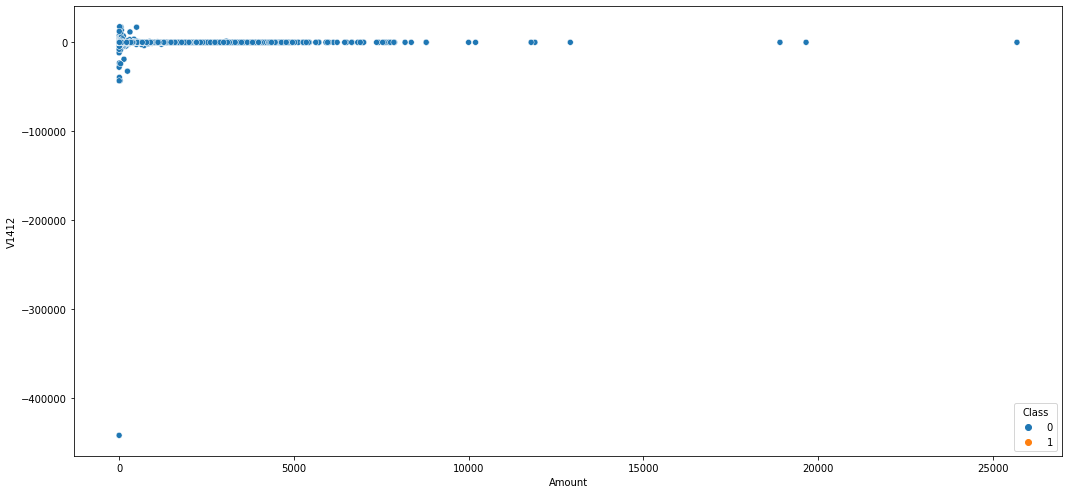

In [216]:
sns.scatterplot(data=data_test,x='Amount',y='V1412',hue='Class')

In [200]:
def strat_split(df,target,test_size,seed):
        
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
    for train_index, test_index in split.split(df, df[f"{target}"]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]
    return strat_train_set,strat_test_set

In [201]:
class_vals = data['Class'].value_counts()
print(class_vals)
# ax = sns.barplot(x=cyl_vals.index,y = cyl_vals.values,data=data)
# ax.set(xlabel='count', ylabel='no of cylinders')


0    284315
1       492
Name: Class, dtype: int64


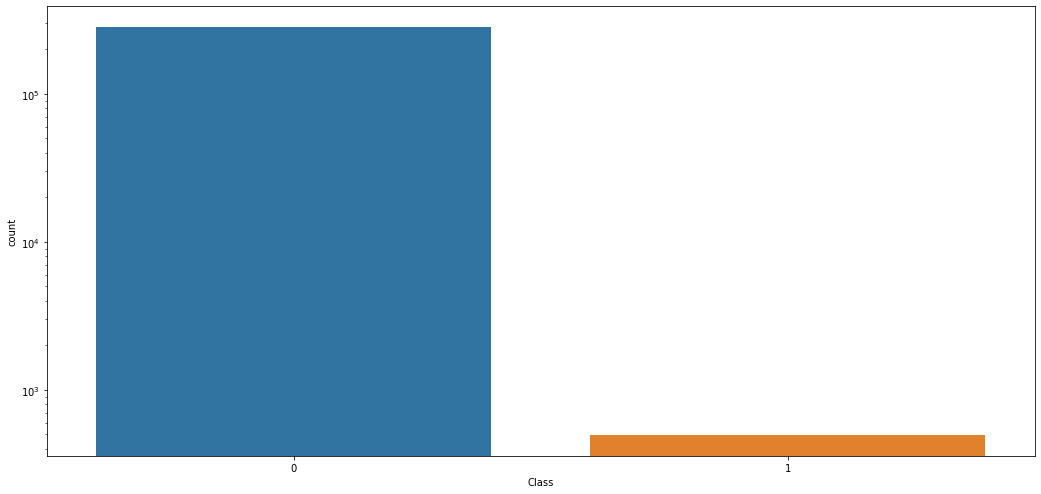

In [202]:
g = sns.countplot(x='Class',data=data)
g.set_yscale("log")
# g.set_ylim(0.05, 1000)

In [203]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [204]:
train_data,val_df = strat_split(data_test,'Class',0.2,42)
print(train_data.shape,val_df.shape)
train_data_class_vals = train_data['Class'].value_counts()
val_class_vals = val_df['Class'].value_counts()
print(train_data_class_vals)
print(val_class_vals)

(227845, 6) (56962, 6)
0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


In [205]:
# train_data = train_data.reset_index(drop=True)
# train_data.head()
train_data = train_data.reset_index(drop=True)
train_data.head()

,V11,V4,Amount,Class,V1714,V1412
0,-0.113729,-0.661630,7.32,0,0.050959,0.001153
1,-0.254903,0.247945,2.99,0,-0.195296,0.055108
2,-0.386845,-0.992425,175.10,0,-0.088944,0.049916
3,0.093136,-1.668119,6.10,0,-0.014213,0.019905
4,-0.251076,-3.454854,86.10,0,-0.053800,0.000054


In [206]:
train_df,test_df = strat_split(data_test,'Class',0.2,42)
print(train_df.shape,test_df.shape)
train_class_vals = train_df['Class'].value_counts()
test_class_vals = test_df['Class'].value_counts()
print(train_class_vals)
print(test_class_vals)

(227845, 6) (56962, 6)
0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


# Training

In [207]:
x_train = train_df.drop('Class',axis=1)
y_train = train_df['Class']

x_test = test_df.drop('Class',axis=1)
y_test = test_df['Class']

x_val = val_df.drop('Class',axis=1)
y_val = val_df['Class']

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape,y_val.shape)


(227845, 5) (227845,)
(56962, 5) (56962,)
(56962, 5) (56962,)


In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

scaler = StandardScaler()
x_val = scaler.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

# y_train = np.array(y_train)
# y_test = np.array(y_test)
# y_val = np.array(y_val)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape,y_val.shape)


(227845, 5) (227845,)
(56962, 5) (56962,)
(56962, 5) (56962,)


In [209]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
y_val_pred = log_reg.predict(x_val)

# Testing

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

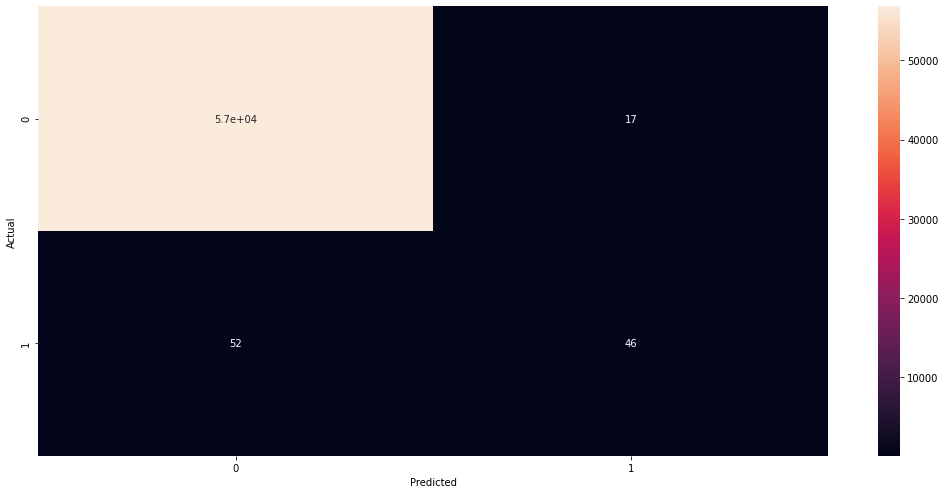

In [210]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [211]:
print(confusion_matrix)

Predicted      0   1
Actual              
0          56847  17
1             52  46


In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.47      0.57        98

    accuracy                           1.00     56962
   macro avg       0.86      0.73      0.79     56962
weighted avg       1.00      1.00      1.00     56962



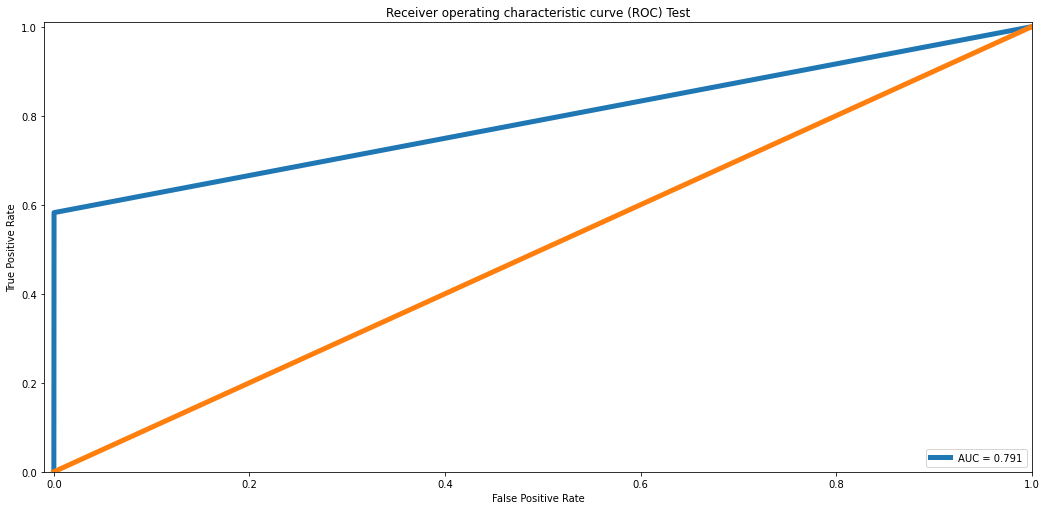

In [89]:
#Plotting the ROC-AUC Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) Test')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Validation

In [90]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.60      0.68        98

    accuracy                           1.00     56962
   macro avg       0.89      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
print(confusion_matrix)

Predicted      0   1
Actual              
0          45484   6
1             39  40


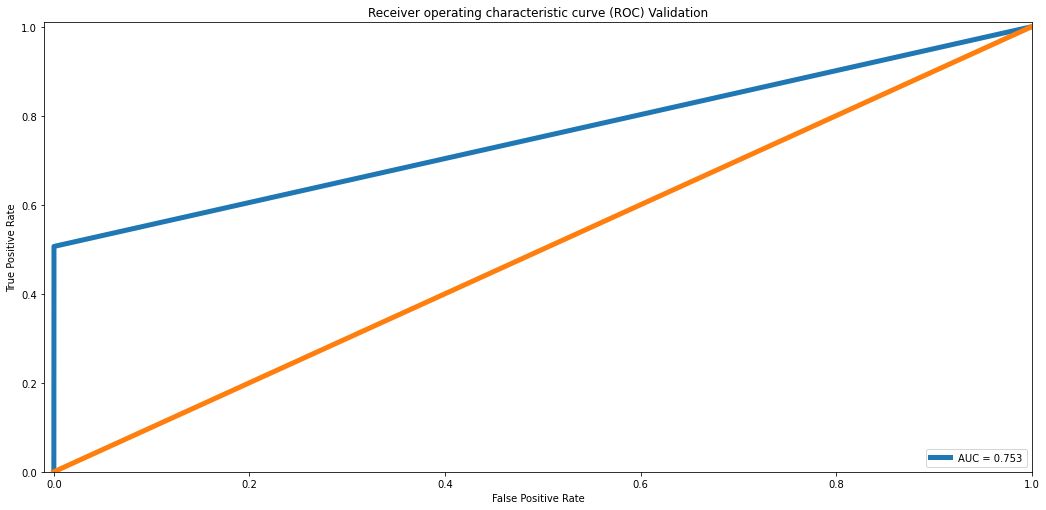

In [37]:
#Plotting the ROC-AUC Curve
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) Validation')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()